In [1]:
import sys
import datetime as dt
import pandas as pd
import numpy as np
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from envir import config

In [2]:
df = pd.read_csv(config.dataFol+'all_cleaned_wsp_sonyc_birds.csv')

In [3]:
df.shape

(756880, 29)

In [4]:
# split into year, month, day, hour
df['timestamp'] = pd.to_datetime(df.timestamp)
df['year'] = pd.DatetimeIndex(df.timestamp).year
df['month'] = pd.DatetimeIndex(df.timestamp).month
df['day'] = pd.DatetimeIndex(df.timestamp).day
df['hour'] = pd.DatetimeIndex(df.timestamp).hour

df['localtime'] = pd.to_datetime(df.timestamp).dt.tz_localize('UTC').dt.tz_convert('America/New_York')
df['localyear'] = pd.DatetimeIndex(df.localtime).year
df['localmonth'] = pd.DatetimeIndex(df.localtime).month
df['localday'] = pd.DatetimeIndex(df.localtime).day
df['localhour'] = pd.DatetimeIndex(df.localtime).hour

In [5]:
df.head(30)

,timestamp,sonyc_sensor_id,sonyc_sensor_name,dBAS_lin_mean,l1,l10,l5,l90,count_of_positive_predictions,pct_positive_predictions,...,s_kimmelCenter,year,month,day,hour,localtime,localyear,localmonth,localday,localhour
0,2017-03-02 07:00:00,b827eb815321,19 Washington Square North,59.166330,66.660000,64.664000,65.864500,52.550000,0.0,0.04918,...,0,2017,3,2,7,2017-03-02 02:00:00-05:00,2017,3,2,2
1,2017-03-02 07:00:00,b827eb0fedda,Juan Carlos,53.477207,61.820500,53.870000,55.319000,51.549000,0.0,0.03333,...,0,2017,3,2,7,2017-03-02 02:00:00-05:00,2017,3,2,2
2,2017-03-02 07:00:00,b827eb1685c7,Shimkin Reading Room,61.856247,70.392100,63.218000,68.984000,58.510000,0.0,0.00000,...,0,2017,3,2,7,2017-03-02 02:00:00-05:00,2017,3,2,2
3,2017-03-02 07:01:00,b827eb815321,19 Washington Square North,57.641624,65.684700,61.611000,63.781998,52.209000,0.0,0.04918,...,0,2017,3,2,7,2017-03-02 02:01:00-05:00,2017,3,2,2
4,2017-03-02 07:01:00,b827eb0fedda,Juan Carlos,60.136166,68.693600,64.030000,67.075000,52.408000,0.0,0.03333,...,0,2017,3,2,7,2017-03-02 02:01:00-05:00,2017,3,2,2
5,2017-03-02 07:01:00,b827eb1685c7,Shimkin Reading Room,60.142982,65.420000,62.557000,63.830500,58.350000,0.0,0.00000,...,0,2017,3,2,7,2017-03-02 02:01:00-05:00,2017,3,2,2
6,2017-03-02 07:02:00,b827eb815321,19 Washington Square North,55.387170,62.372200,59.152000,60.933000,52.238003,0.0,0.04918,...,0,2017,3,2,7,2017-03-02 02:02:00-05:00,2017,3,2,2
7,2017-03-02 07:02:00,b827eb0fedda,Juan Carlos,65.012180,76.142400,67.568000,69.380000,53.140000,0.0,0.03333,...,0,2017,3,2,7,2017-03-02 02:02:00-05:00,2017,3,2,2
8,2017-03-02 07:02:00,b827eb1685c7,Shimkin Reading Room,62.167492,69.641400,64.564000,67.065994,58.719000,0.0,0.00000,...,0,2017,3,2,7,2017-03-02 02:02:00-05:00,2017,3,2,2
9,2017-03-02 07:03:00,b827eb815321,19 Washington Square North,57.049260,64.896300,61.907000,63.248500,51.808002,0.0,0.04918,...,0,2017,3,2,7,2017-03-02 02:03:00-05:00,2017,3,2,2


In [6]:
df.groupby(['sonyc_sensor_name', 'year', 'month', 'day', 'hour']).mean().reset_index()

,sonyc_sensor_name,year,month,day,hour,dBAS_lin_mean,l1,l10,l5,l90,...,s_19WashingtonSquareNorth,s_silverLab,s_juanCarlos,s_shimkinReadingRoom,s_4WashingtonSquareNorth,s_kimmelCenter,localyear,localmonth,localday,localhour
0,19 Washington Square North,2017,3,2,7,59.056564,66.302774,62.327365,64.217849,54.086302,...,1,0,0,0,0,0,2017,3,2,2
1,19 Washington Square North,2017,3,2,8,59.513336,66.947655,62.586933,64.717150,54.246434,...,1,0,0,0,0,0,2017,3,2,3
2,19 Washington Square North,2017,3,2,9,57.398581,65.158093,60.215550,62.863567,52.736250,...,1,0,0,0,0,0,2017,3,2,4
3,19 Washington Square North,2017,3,2,10,58.589814,66.642547,61.594557,64.254238,53.239213,...,1,0,0,0,0,0,2017,3,2,5
4,19 Washington Square North,2017,3,2,11,60.126293,67.966649,63.798313,65.982016,54.056032,...,1,0,0,0,0,0,2017,3,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14303,Shimkin Reading Room,2020,5,8,12,61.183971,68.563647,62.985419,65.382105,57.201721,...,0,0,0,1,0,0,2020,5,8,8
14304,Shimkin Reading Room,2020,5,8,13,61.606343,68.528610,63.214800,65.332000,57.889584,...,0,0,0,1,0,0,2020,5,8,9
14305,Shimkin Reading Room,2020,5,8,14,61.728133,69.112118,63.846704,65.651172,57.748394,...,0,0,0,1,0,0,2020,5,8,10
14306,Shimkin Reading Room,2020,5,8,15,61.828976,69.111100,63.654176,65.796228,58.069597,...,0,0,0,1,0,0,2020,5,8,11


In [7]:
df.columns

Index(['timestamp', 'sonyc_sensor_id', 'sonyc_sensor_name', 'dBAS_lin_mean',
       'l1', 'l10', 'l5', 'l90', 'count_of_positive_predictions',
       'pct_positive_predictions', 'avg_mtr_#/km/h', 'avg_mt_#/km',
       'avg_height_m', 'temp_celcius', 'dewp_celcius', 'rh_percentage',
       'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
       'precipitation_mm', 'visibility_miles', 'gust_mph',
       'peak_wind_gust_mph', 's_19WashingtonSquareNorth', 's_silverLab',
       's_juanCarlos', 's_shimkinReadingRoom', 's_4WashingtonSquareNorth',
       's_kimmelCenter', 'year', 'month', 'day', 'hour', 'localtime',
       'localyear', 'localmonth', 'localday', 'localhour'],
      dtype='object')

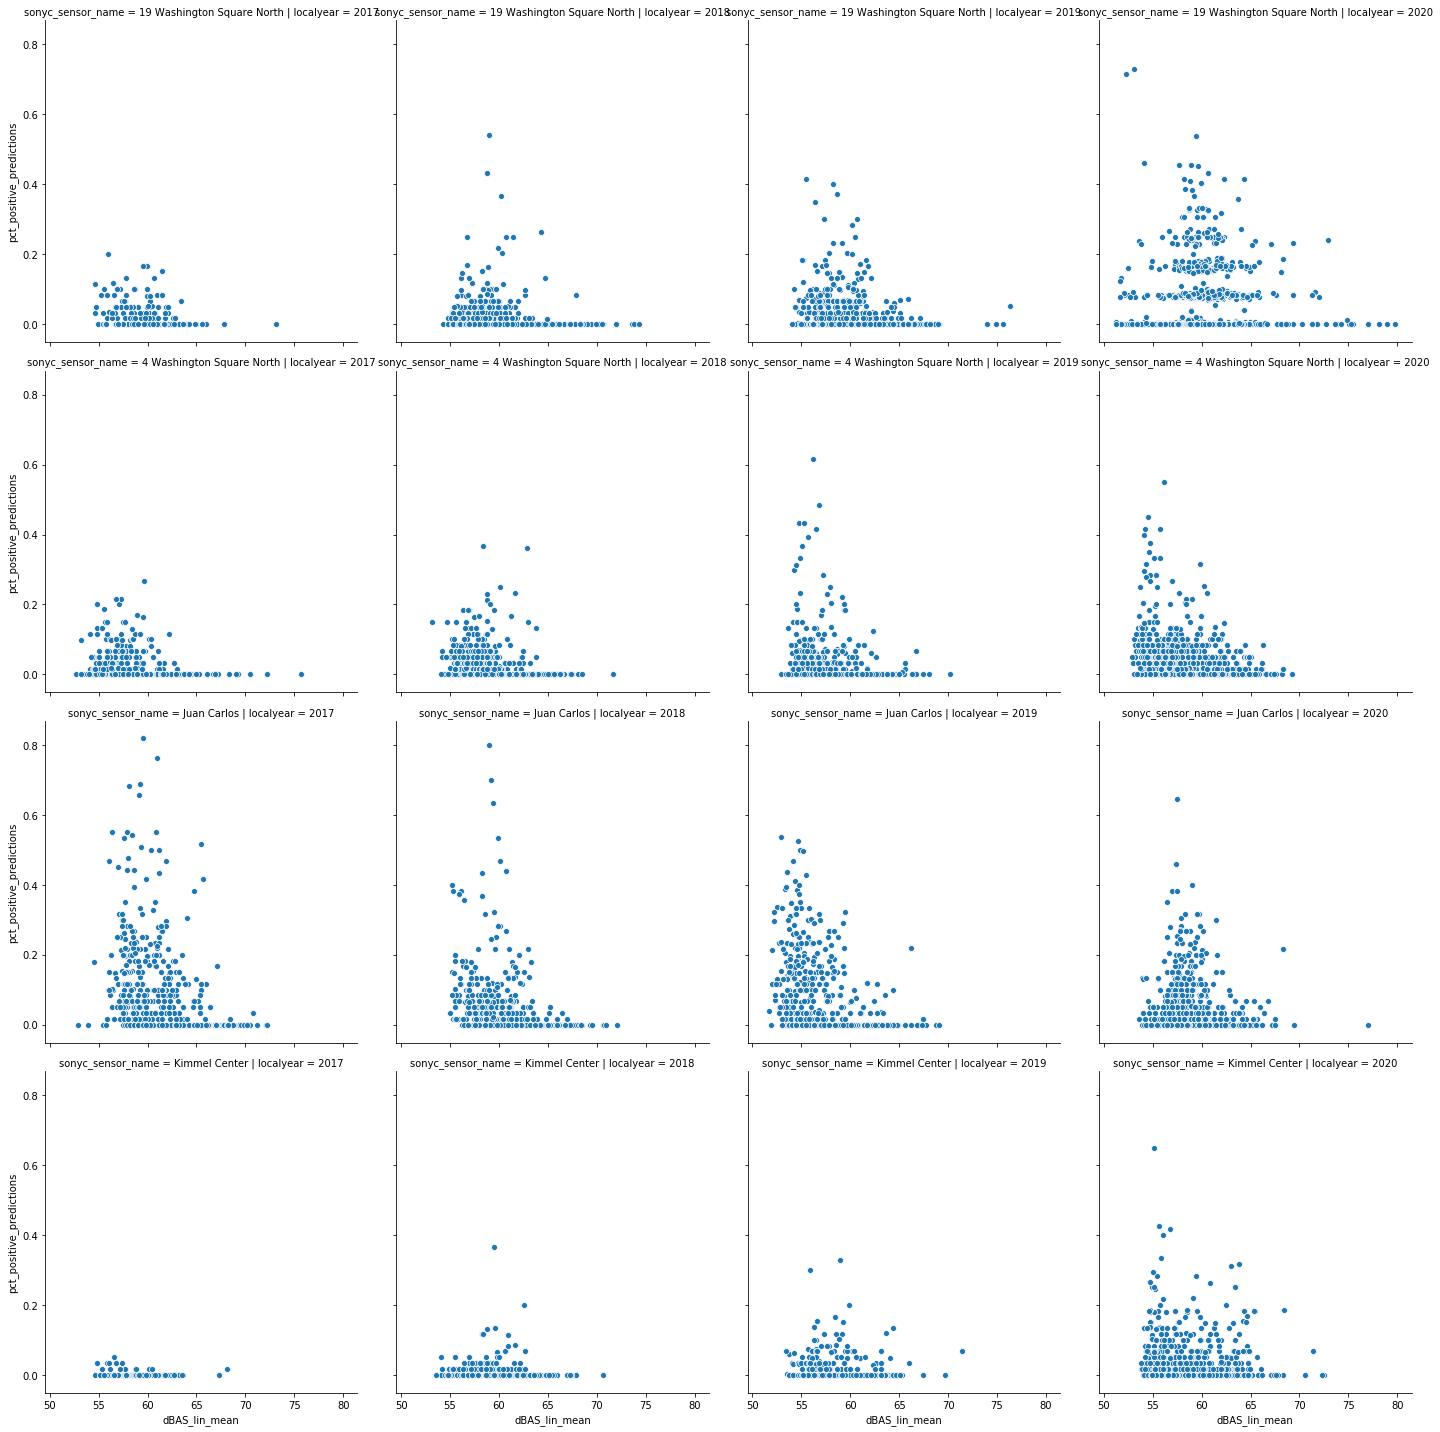

In [8]:
#scatter plot: x="dBAS_lin_mean", y="pct_positive_predictions"
sns.relplot(x="dBAS_lin_mean", y="pct_positive_predictions",
            col="localyear", row="sonyc_sensor_name",
            data=df[(df['sonyc_sensor_name'] != 'Shimkin Reading Room') ][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())

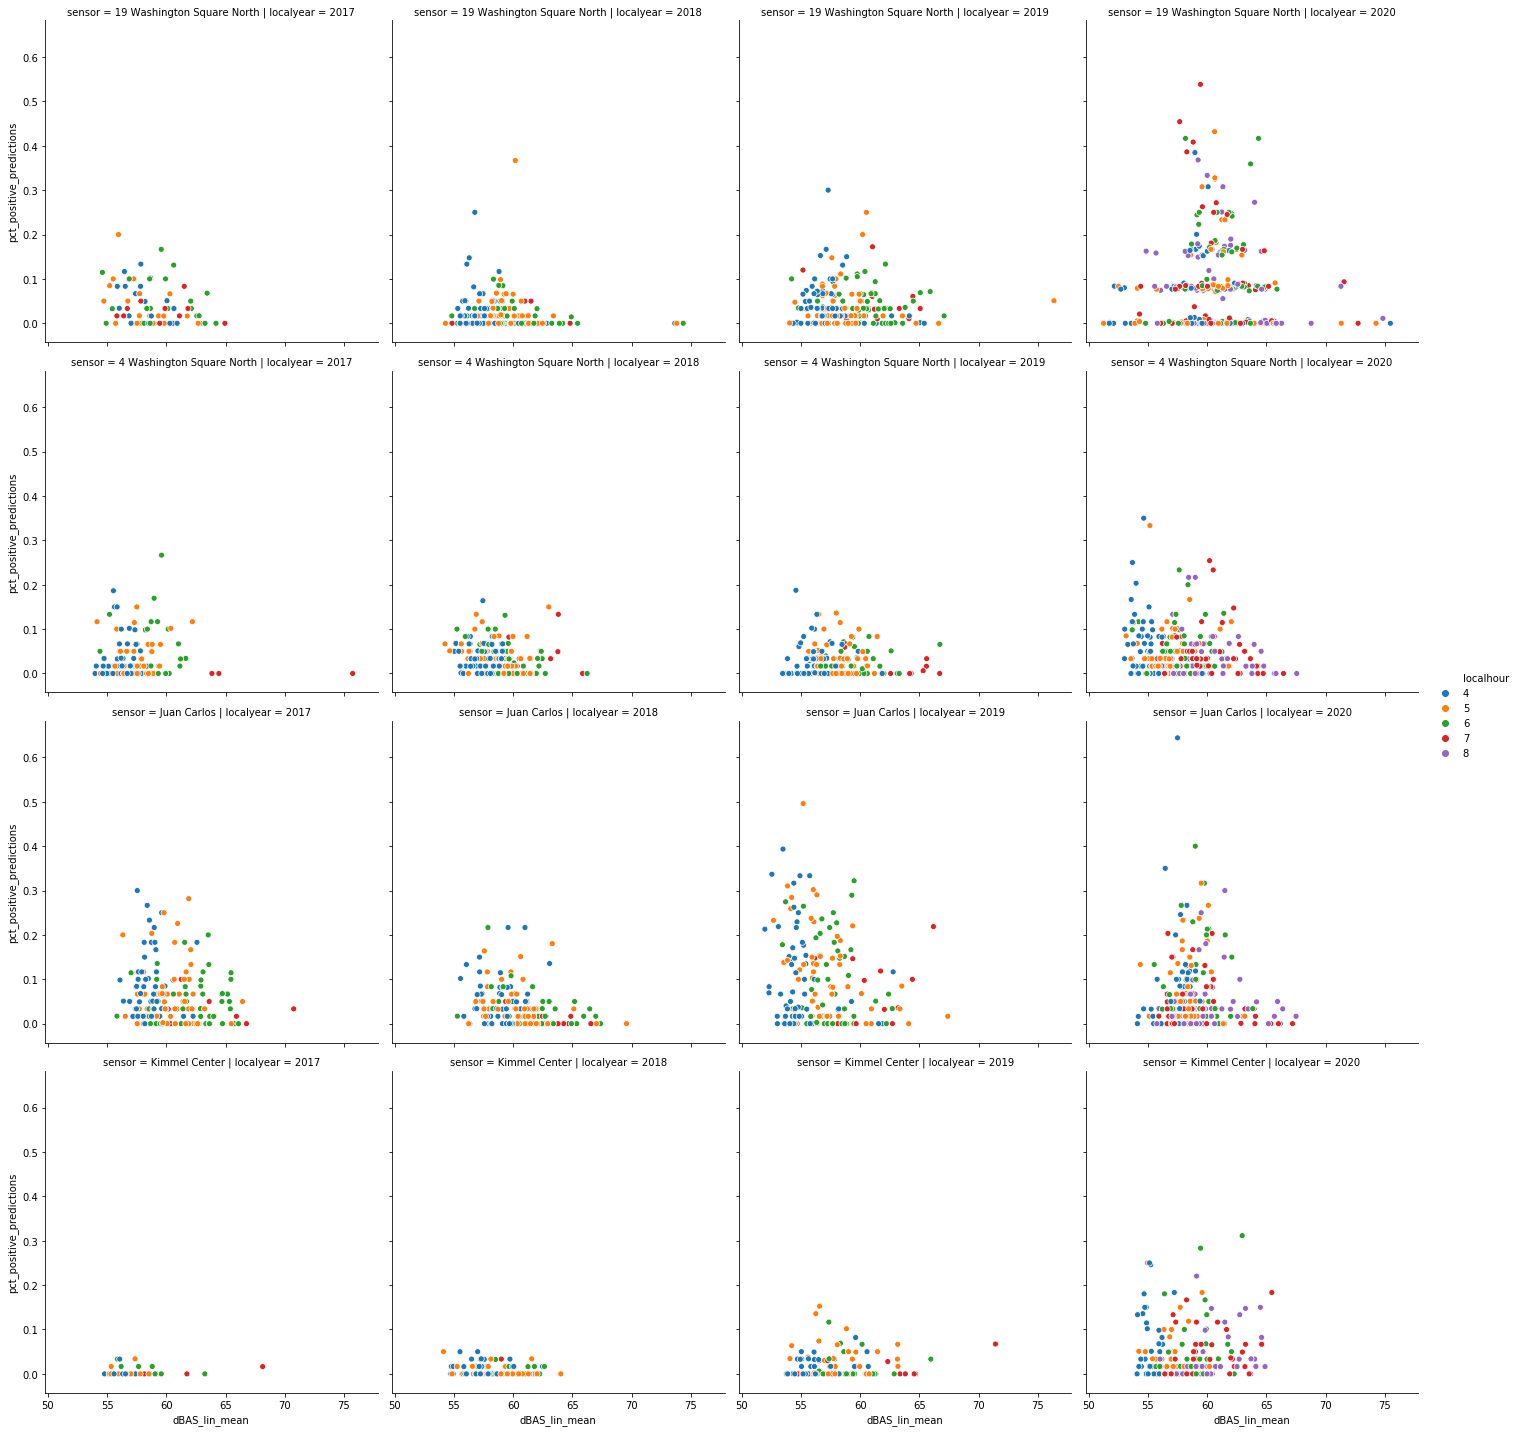

In [9]:
#scatter plot: x="dBAS_lin_mean", y="pct_positive_predictions", localhour in range [6,8]
sns.relplot(x="dBAS_lin_mean", y="pct_positive_predictions",
            col="localyear", row="sensor", hue = 'localhour', palette = 'tab10', 
            data=df[(df.localhour>=4) & (df.localhour <=8) & (df['sonyc_sensor_name'] != 'Shimkin Reading Room')\
                                                           ][['sonyc_sensor_name', 'localyear',
                                                            'localmonth', 'localday', 'localhour',
                                                            'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index()\
            .rename(columns = {'sonyc_sensor_name':'sensor'}))

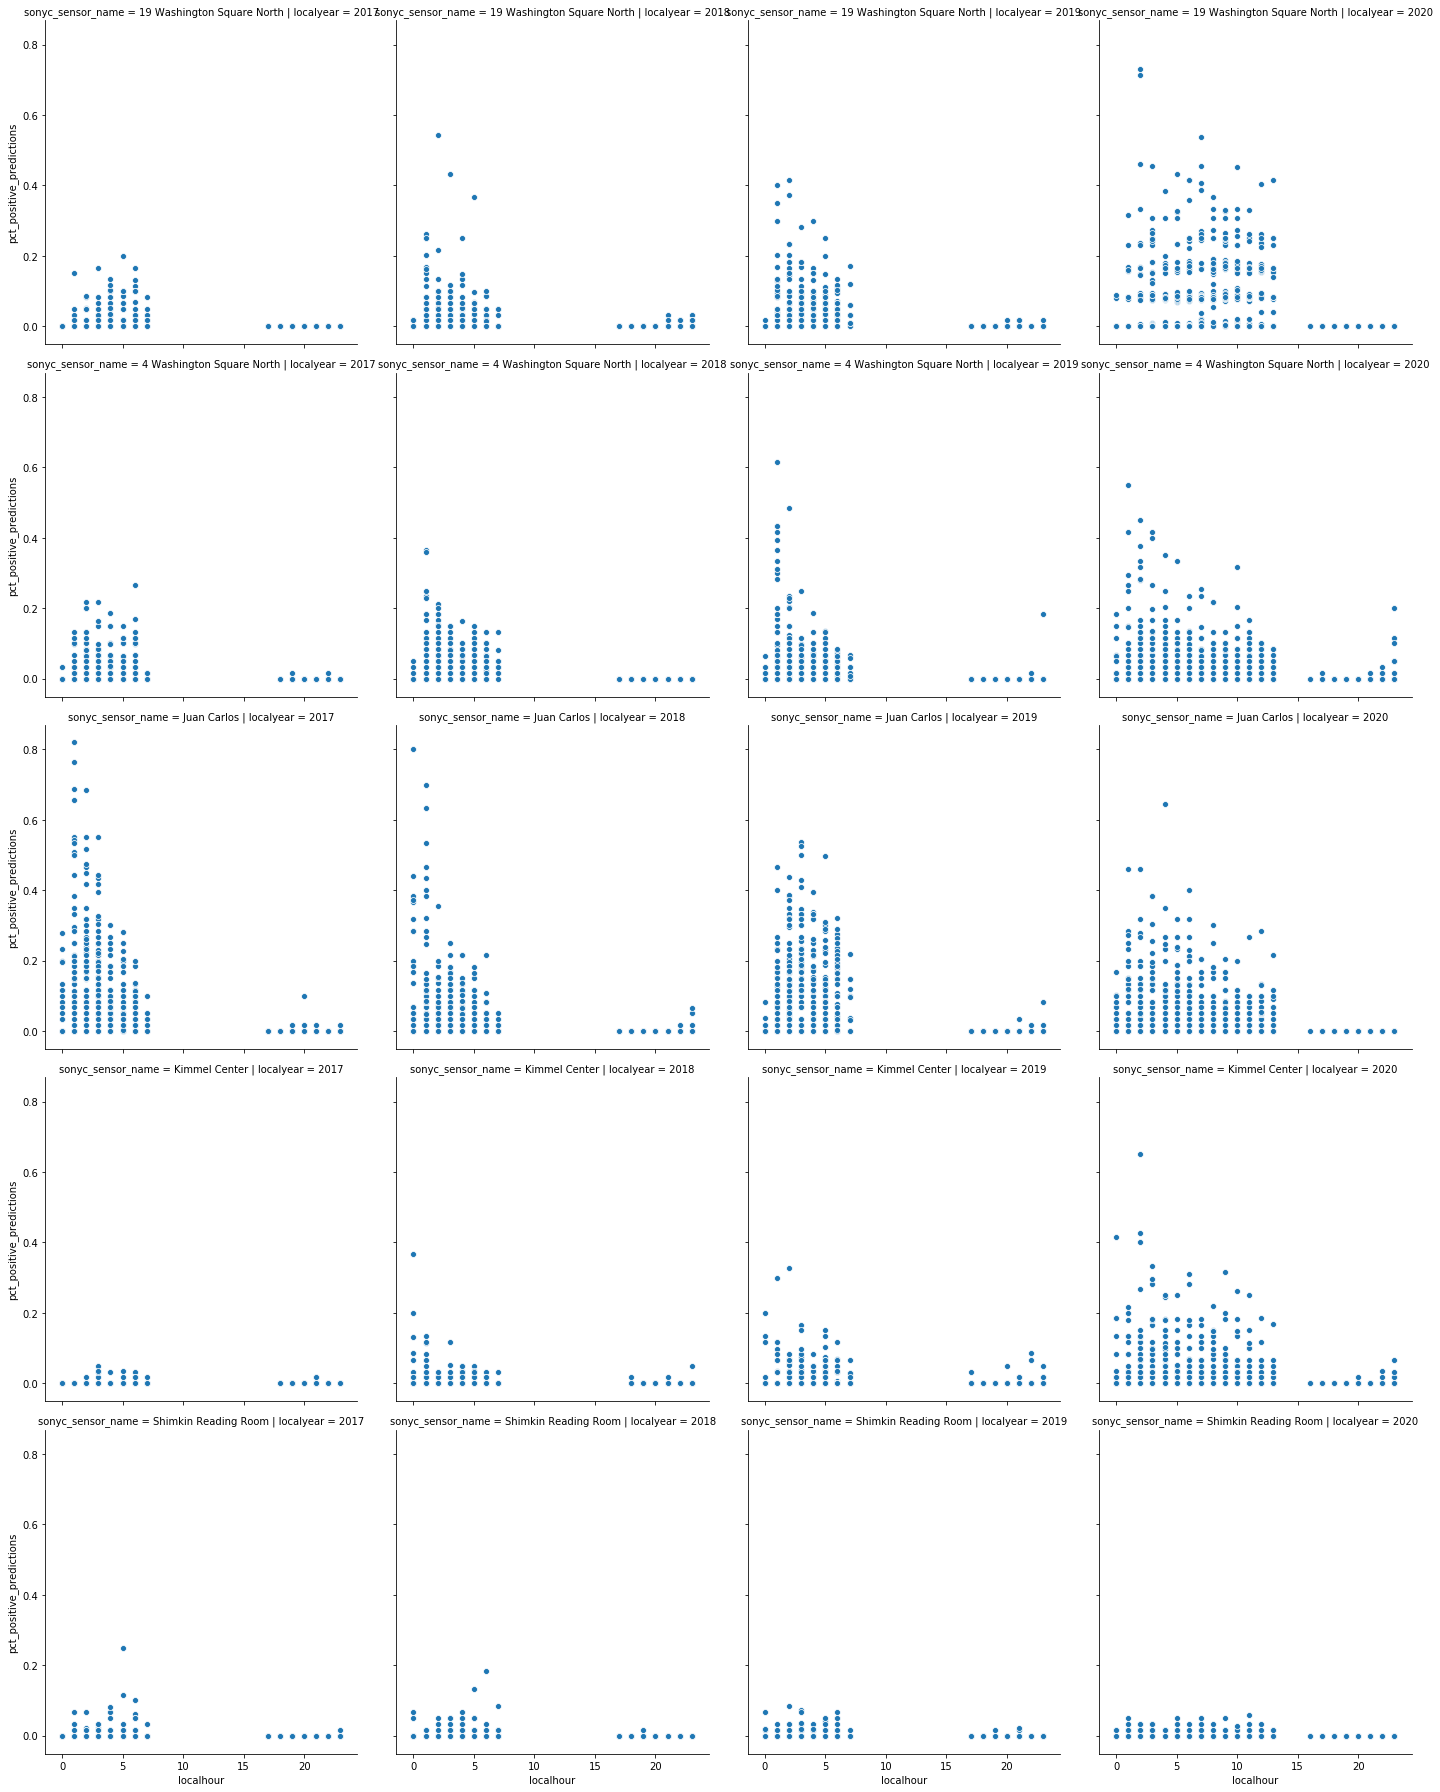

In [10]:
#Distribution of pct_positive_predictions over 24 hour
sns.relplot(x="localhour", y="pct_positive_predictions",
            col="localyear", row="sonyc_sensor_name", 
            data=df[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())

#### Create a new dataframe which excludes 'Silver lab', 'Shimkin Reading Room' with localhour in range [4, 8]

In [11]:
df.shape

(756880, 38)

In [12]:
df_new = df[(df['sonyc_sensor_name'] != 'NaN') &(df.localhour>=4) & (df.localhour <=8) &\
            (df['sonyc_sensor_name'] != 'Shimkin Reading Room')].copy()
df_new.shape

(147050, 38)

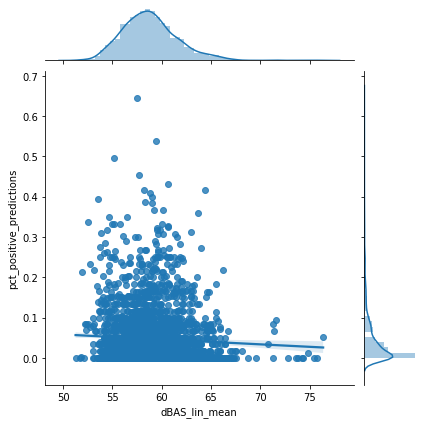

In [13]:
#relationship between dBAS_lin_mean and pct_positive_predictions (including 0, between 4 am - 8 am)
sns.jointplot(x="dBAS_lin_mean", y="pct_positive_predictions", kind="reg",
            data=df_new[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())


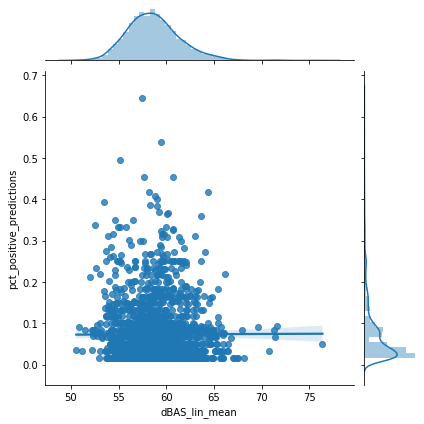

In [14]:
#relationship between dBAS_lin_mean and pct_positive_predictions (greater than 0, between 4 am - 8 am)
sns.jointplot(x="dBAS_lin_mean", y="pct_positive_predictions", kind="reg",
            data=df_new[(df_new.pct_positive_predictions > 0)][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())


In [15]:
df_normal_test = df_new[(df_new.pct_positive_predictions > 0)][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name','localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index()

In [16]:
df_normal_test.shape

(1958, 7)

In [17]:
from scipy import stats
pts = 1000
np.random.seed(28041990)
a = df_normal_test.dBAS_lin_mean
b = df_normal_test.pct_positive_predictions
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0
The null hypothesis can be rejected


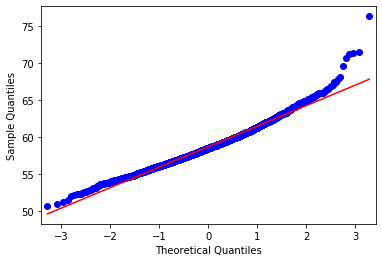

In [18]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt 

data = df_normal_test.dBAS_lin_mean
# q-q plot
qqplot(data, line='s')
plt.show()

Text(0.5, 1.0, 'dBAS_lin_mean Histogram')

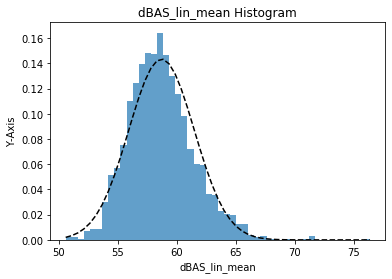

In [19]:
data = df_normal_test.dBAS_lin_mean
mu = data.mean()
sigma = data.std()
num_bins = 50
   
n, bins, patches = plt.hist(data, num_bins,density = 1,  alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
 
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('dBAS_lin_mean') 
plt.ylabel('Y-Axis') 
  
plt.title('dBAS_lin_mean Histogram') 

In [20]:
mu+3*sigma

67.0292346073409

In [21]:
mu-3*sigma

50.3488773409398

In [22]:
print(stats.shapiro(data))

(0.9780428409576416, 8.878753539585756e-17)


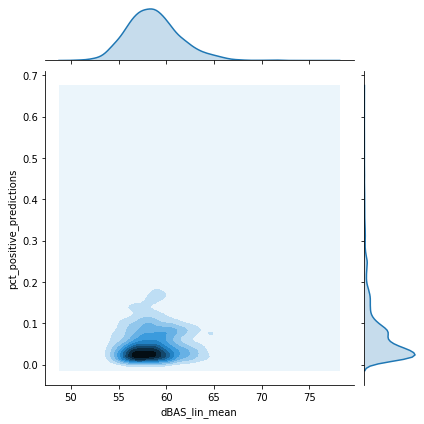

In [23]:
#relationship between dBAS_lin_mean and pct_positive_predictions (greater than 0, between 4 am - 8 am)
sns.jointplot(x="dBAS_lin_mean", y="pct_positive_predictions", kind="kde",
            data=df_new[(df_new.pct_positive_predictions > 0)][['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())


In [33]:
df_new = df[(df['sonyc_sensor_name'] != 'NaN') &(df.localhour>=4) & (df.localhour <=8) &\
            (df['sonyc_sensor_name'] != 'Shimkin Reading Room')]


In [34]:
df_new.columns

Index(['timestamp', 'sonyc_sensor_id', 'sonyc_sensor_name', 'dBAS_lin_mean',
       'l1', 'l10', 'l5', 'l90', 'count_of_positive_predictions',
       'pct_positive_predictions', 'avg_mtr_#/km/h', 'avg_mt_#/km',
       'avg_height_m', 'temp_celcius', 'dewp_celcius', 'rh_percentage',
       'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
       'precipitation_mm', 'visibility_miles', 'gust_mph',
       'peak_wind_gust_mph', 's_19WashingtonSquareNorth', 's_silverLab',
       's_juanCarlos', 's_shimkinReadingRoom', 's_4WashingtonSquareNorth',
       's_kimmelCenter', 'year', 'month', 'day', 'hour', 'localtime',
       'localyear', 'localmonth', 'localday', 'localhour'],
      dtype='object')

In [42]:
df_corr = df_new[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour',
                  'pct_positive_predictions','count_of_positive_predictions','dBAS_lin_mean',
                    'l1','l5','l10','l90',
                   'avg_mtr_#/km/h', 'avg_mt_#/km','avg_height_m', 'temp_celcius', 'dewp_celcius', 'rh_percentage',
                   'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
                   'precipitation_mm', 'visibility_miles', 'gust_mph','peak_wind_gust_mph',]]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean()

In [43]:
df_corr.columns

Index(['pct_positive_predictions', 'count_of_positive_predictions',
       'dBAS_lin_mean', 'l1', 'l5', 'l10', 'l90', 'avg_mtr_#/km/h',
       'avg_mt_#/km', 'avg_height_m', 'temp_celcius', 'dewp_celcius',
       'rh_percentage', 'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
       'precipitation_mm', 'visibility_miles', 'gust_mph',
       'peak_wind_gust_mph'],
      dtype='object')

In [44]:
corr = df_corr.corr()
corr

,pct_positive_predictions,count_of_positive_predictions,dBAS_lin_mean,l1,l5,l10,l90,avg_mtr_#/km/h,avg_mt_#/km,avg_height_m,temp_celcius,dewp_celcius,rh_percentage,wind_dir,wind_speed_mph,sea_level_pressure_mb,precipitation_mm,visibility_miles,gust_mph,peak_wind_gust_mph
pct_positive_predictions,1.000000,0.805572,-0.053347,-0.052298,-0.055732,-0.055151,-0.028826,-0.004784,0.048177,-0.058325,0.125028,0.068269,-0.019440,0.001473,-0.060673,0.023072,-0.044260,0.060249,-0.077307,-0.025463
count_of_positive_predictions,0.805572,1.000000,-0.079729,-0.076895,-0.078569,-0.077878,-0.054972,0.012477,0.038320,-0.049461,0.080889,0.044109,-0.010600,-0.005487,-0.046980,0.007476,-0.011439,0.026448,-0.037824,-0.019368
dBAS_lin_mean,-0.053347,-0.079729,1.000000,0.915234,0.950045,0.980665,0.819344,-0.027037,-0.068765,-0.010069,0.140246,0.213089,0.214277,-0.044061,0.079249,-0.119816,0.237816,-0.179898,0.100910,0.091326
l1,-0.052298,-0.076895,0.915234,1.000000,0.984237,0.950582,0.541684,-0.055516,-0.055914,0.005152,0.069024,0.126649,0.144510,-0.031187,0.078715,-0.070183,0.216688,-0.169853,0.088202,0.095193
l5,-0.055732,-0.078569,0.950045,0.984237,1.000000,0.984441,0.616964,-0.042901,-0.048113,0.002991,0.087475,0.154573,0.172230,-0.029133,0.074494,-0.091721,0.228236,-0.179566,0.093591,0.094402
l10,-0.055151,-0.077878,0.980665,0.950582,0.984441,1.000000,0.721113,-0.033166,-0.039340,-0.001889,0.127801,0.199378,0.204437,-0.038900,0.070254,-0.111019,0.238626,-0.189129,0.097492,0.086978
l90,-0.028826,-0.054972,0.819344,0.541684,0.616964,0.721113,1.000000,0.008073,-0.067039,-0.032806,0.229140,0.296020,0.256867,-0.057632,0.062287,-0.158156,0.191589,-0.133076,0.091055,0.058884
avg_mtr_#/km/h,-0.004784,0.012477,-0.027037,-0.055516,-0.042901,-0.033166,0.008073,1.000000,0.236208,0.089267,0.187940,0.195930,0.130329,-0.028828,-0.091711,-0.043010,0.025131,-0.105876,0.001338,-0.011040
avg_mt_#/km,0.048177,0.038320,-0.068765,-0.055914,-0.048113,-0.039340,-0.067039,0.236208,1.000000,0.141270,0.510135,0.432967,0.180740,-0.056326,-0.195315,-0.159270,0.059348,-0.111125,-0.134804,-0.120815
avg_height_m,-0.058325,-0.049461,-0.010069,0.005152,0.002991,-0.001889,-0.032806,0.089267,0.141270,1.000000,0.134520,0.247521,0.285203,-0.292321,-0.072540,-0.068269,0.098004,-0.189377,-0.108611,-0.073887


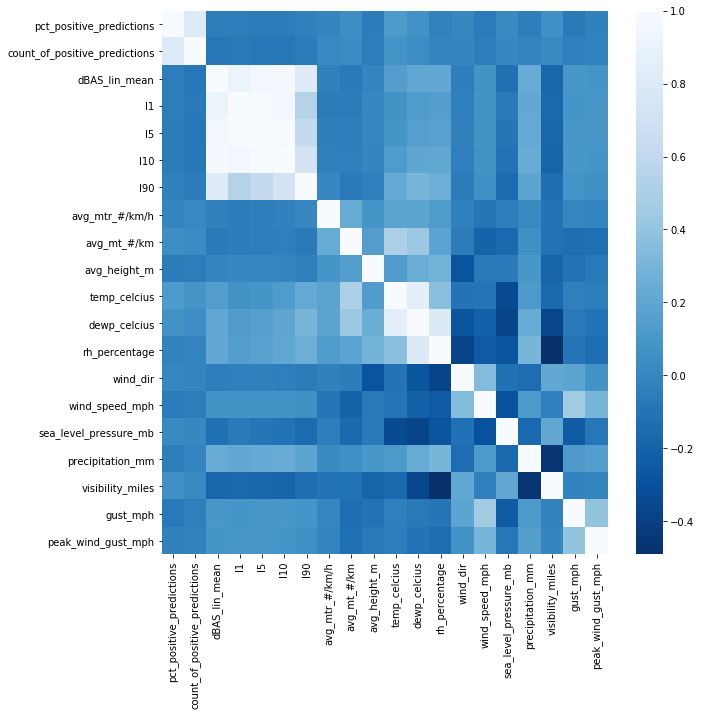

In [45]:
fig, ax = plt.subplots(figsize=(10,10))        
ax = sns.heatmap(corr , cmap = 'Blues_r')

In [24]:
# Check if there's any high correlations
# df_new: df[(df['sonyc_sensor_name'] != 'NaN') &(df.localhour>=4) & (df.localhour <=8) &\
#             (df['sonyc_sensor_name'] != 'Shimkin Reading Room')]

df_corr = df_new[['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour','dBAS_lin_mean',\
              'l1','l5','l10','l90',\
             'pct_positive_predictions','precipitation_mm','temp_celcius','wind_speed_mph']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean()

corr = df_corr.corr()
 
corr

,dBAS_lin_mean,l1,l5,l10,l90,pct_positive_predictions,precipitation_mm,temp_celcius,wind_speed_mph
dBAS_lin_mean,1.000000,0.915234,0.950045,0.980665,0.819344,-0.053347,0.237816,0.140246,0.079249
l1,0.915234,1.000000,0.984237,0.950582,0.541684,-0.052298,0.216688,0.069024,0.078715
l5,0.950045,0.984237,1.000000,0.984441,0.616964,-0.055732,0.228236,0.087475,0.074494
l10,0.980665,0.950582,0.984441,1.000000,0.721113,-0.055151,0.238626,0.127801,0.070254
l90,0.819344,0.541684,0.616964,0.721113,1.000000,-0.028826,0.191589,0.229140,0.062287
pct_positive_predictions,-0.053347,-0.052298,-0.055732,-0.055151,-0.028826,1.000000,-0.044260,0.125028,-0.060673
precipitation_mm,0.237816,0.216688,0.228236,0.238626,0.191589,-0.044260,1.000000,0.115204,0.120367
temp_celcius,0.140246,0.069024,0.087475,0.127801,0.229140,0.125028,0.115204,1.000000,-0.099377
wind_speed_mph,0.079249,0.078715,0.074494,0.070254,0.062287,-0.060673,0.120367,-0.099377,1.000000


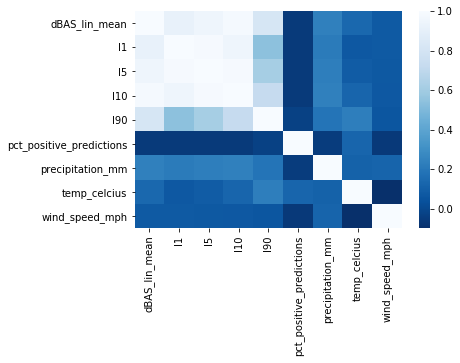

In [25]:
# Heatmap
sns.heatmap(corr, cmap = 'Blues_r')

In [26]:
# normalize ???
# normal distribution
# polynomial regression

### Modeling exploration

In [230]:
import statsmodels.regression.linear_model as smf1
import statsmodels.formula.api as smf


In [231]:
#Create a column to normalize dBAS_lin_mean
dBAS_lin_mean_min = min(df_new['dBAS_lin_mean'])
dBAS_lin_mean_max = max(df_new['dBAS_lin_mean'])
dBAS_lin_mean_min,dBAS_lin_mean_max

(48.333153, 96.05568)

In [232]:
# df_new: df[(df['sonyc_sensor_name'] != 'NaN') &(df.localhour>=4) & (df.localhour <=8) &\
#             (df['sonyc_sensor_name'] != 'Shimkin Reading Room')]

df_new['dBAS_lin_mean_scaled'] = (df_new['dBAS_lin_mean']-dBAS_lin_mean_min)/(dBAS_lin_mean_max-dBAS_lin_mean_min)
min(df_new['dBAS_lin_mean_scaled']),max(df_new['dBAS_lin_mean_scaled'])

(0.0, 1.0)

#### Uni-variate linear regression

In [233]:
#pct_positive_predictions~dBAS_lin_mean-1 (WITHOUT INTERCEPT)
lm = smf.ols(formula='pct_positive_predictions~dBAS_lin_mean-1', data = df_new).fit()
print(lm.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_positive_predictions   R-squared (uncentered):                   0.332
Model:                                  OLS   Adj. R-squared (uncentered):              0.332
Method:                       Least Squares   F-statistic:                          7.302e+04
Date:                      Sun, 21 Jun 2020   Prob (F-statistic):                        0.00
Time:                              18:22:07   Log-Likelihood:                      1.8544e+05
No. Observations:                    147050   AIC:                                 -3.709e+05
Df Residuals:                        147049   BIC:                                 -3.709e+05
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                    coef    std err          t      P>|t|   

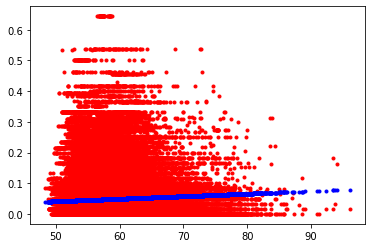

In [258]:
df_new['ypred']=lm.predict() #predicted regression values
plt.plot(df_new.dBAS_lin_mean,df_new.pct_positive_predictions,'.r') #plot the data
plt.plot(df_new.dBAS_lin_mean,df_new.ypred,'.b') #plot the regression

In [237]:
#pct_positive_predictions~dBAS_lin_mean (WITH INTERCEPT)
lm2 = smf.ols(formula='pct_positive_predictions~dBAS_lin_mean', data = df_new).fit()
print(lm2.summary())

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                  0.001
Method:                       Least Squares   F-statistic:                     94.82
Date:                      Sun, 21 Jun 2020   Prob (F-statistic):           2.11e-22
Time:                              18:22:39   Log-Likelihood:             1.8588e+05
No. Observations:                    147050   AIC:                        -3.718e+05
Df Residuals:                        147048   BIC:                        -3.717e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

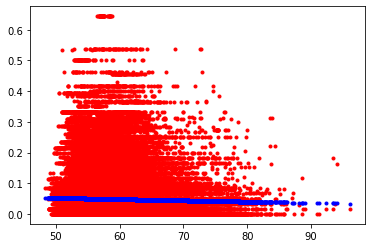

In [257]:
df_new['ypred2']=lm2.predict() #predicted regression values
plt.plot(df_new.dBAS_lin_mean,df_new.pct_positive_predictions,'.r') #plot the data
plt.plot(df_new.dBAS_lin_mean,df_new.ypred2,'.b') #plot the regression

#### Multi-variate regression 

In [276]:
factors = ['dBAS_lin_mean','s_19WashingtonSquareNorth','s_juanCarlos', 's_4WashingtonSquareNorth',
       's_kimmelCenter']
formula = 'pct_positive_predictions~'+ '+'.join(factors) + '-1'
formula

'pct_positive_predictions~dBAS_lin_mean+s_19WashingtonSquareNorth+s_juanCarlos+s_4WashingtonSquareNorth+s_kimmelCenter-1'

In [277]:
#pct_positive_predictions~dBAS_lin_mean-1 (WITHOUT INTERCEPT)
lm = smf.ols(formula=formula, data = df_new).fit()
print(lm.summary())

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.046
Method:                       Least Squares   F-statistic:                     1779.
Date:                      Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                              18:37:35   Log-Likelihood:             1.8931e+05
No. Observations:                    147050   AIC:                        -3.786e+05
Df Residuals:                        147045   BIC:                        -3.786e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

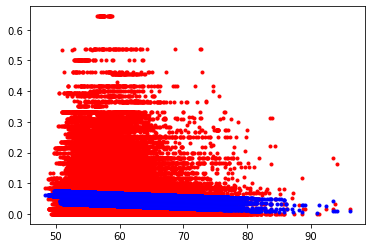

In [280]:
#visualize regression fit
df_new['ypred']=lm.predict() #predicted regression values
plt.plot(df_new.dBAS_lin_mean,df_new.pct_positive_predictions,'.r') #plot the data
plt.plot(df_new.dBAS_lin_mean,df_new.ypred,'.b') #plot the regression

In [282]:
formula2 = 'pct_positive_predictions~'+ '+'.join(factors)
formula2

'pct_positive_predictions~dBAS_lin_mean+s_19WashingtonSquareNorth+s_juanCarlos+s_4WashingtonSquareNorth+s_kimmelCenter'

In [283]:
#pct_positive_predictions~dBAS_lin_mean-1 (WITHOUT INTERCEPT)
lm2 = smf.ols(formula=formula2, data = df_new).fit()
print(lm2.summary())

                               OLS Regression Results                               
Dep. Variable:     pct_positive_predictions   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.046
Method:                       Least Squares   F-statistic:                     1423.
Date:                      Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                              18:40:10   Log-Likelihood:             1.8931e+05
No. Observations:                    147050   AIC:                        -3.786e+05
Df Residuals:                        147044   BIC:                        -3.785e+05
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

#### Polynomial regression (without intercept)

In [239]:
df_new['dBAS_lin_mean2']=df_new.dBAS_lin_mean**2

In [240]:
lm3 = smf.ols(formula='pct_positive_predictions~dBAS_lin_mean+dBAS_lin_mean2-1', data = df_new).fit()
print(lm3.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_positive_predictions   R-squared (uncentered):                   0.336
Model:                                  OLS   Adj. R-squared (uncentered):              0.336
Method:                       Least Squares   F-statistic:                          3.720e+04
Date:                      Sun, 21 Jun 2020   Prob (F-statistic):                        0.00
Time:                              18:24:08   Log-Likelihood:                      1.8590e+05
No. Observations:                    147050   AIC:                                 -3.718e+05
Df Residuals:                        147048   BIC:                                 -3.718e+05
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                                  
                     coef    std err          t      P>|t|  

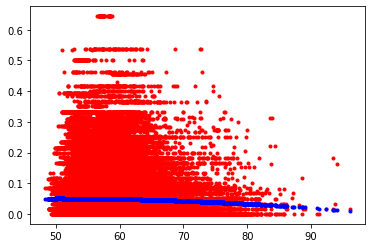

In [256]:
#visualize regression fit
df_new['ypred_lm3']=lm3.predict() #predicted regression values
plt.plot(df_new.dBAS_lin_mean,df_new.pct_positive_predictions,'.r') #plot the data
plt.plot(df_new.dBAS_lin_mean,df_new.ypred_lm3,'.b') #plot the regression

In [259]:
#add more powers of x up to M'th
M=3
for p in range(1,M+1): 
    df_new['dBAS_lin_mean%d'%p]=df_new.dBAS_lin_mean**p  

In [267]:
formula='pct_positive_predictions~dBAS_lin_mean+'+'+'.join(['dBAS_lin_mean%d'%p for p in range(2,M+1)])+'-1'; 
formula

'pct_positive_predictions~dBAS_lin_mean+dBAS_lin_mean2+dBAS_lin_mean3-1'

In [268]:
lm4 = smf.ols(formula=formula, data = df_new).fit()
print(lm4.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_positive_predictions   R-squared (uncentered):                   0.336
Model:                                  OLS   Adj. R-squared (uncentered):              0.336
Method:                       Least Squares   F-statistic:                          2.480e+04
Date:                      Sun, 21 Jun 2020   Prob (F-statistic):                        0.00
Time:                              18:32:38   Log-Likelihood:                      1.8591e+05
No. Observations:                    147050   AIC:                                 -3.718e+05
Df Residuals:                        147047   BIC:                                 -3.718e+05
Df Model:                                 3                                                  
Covariance Type:                  nonrobust                                                  
                     coef    std err          t      P>|t|  

No handles with labels found to put in legend.


Text(0, 0.5, 'positive_predictions')

/home/cusp/xy1443/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


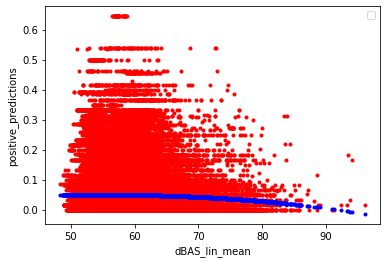

In [269]:
df_new['ypred_lm4']=lm4.predict() #predicted regression values
plt.plot(df_new.dBAS_lin_mean,df_new.pct_positive_predictions,'.r') #plot the data
plt.plot(df_new.dBAS_lin_mean,df_new.ypred_lm4,'.b') #plot the regression
plt.legend()
plt.xlabel('dBAS_lin_mean')
plt.ylabel('positive_predictions')